# Task 2
## Diffusion Maps

In [1]:
from task2.diffusion_maps import DiffusionMap
from task2.diffusion_maps import get_part_one_dataset, plot_fourier
from pca import *

import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll

#### Task2.1: compute five eigenfunctions $\phi_l$ associated to the largest eigenvalues $\lambda_l$ with Diffusion Maps, on a periodic data set with N = 1000 points given by (see exercise sheet, task2)

doing task2.1


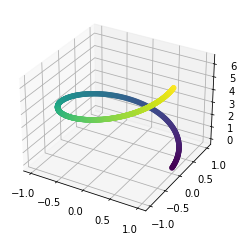

(1000, 1000)


D:\UniPi\erasmus\courses\MLCS\MLCMS-exercises\EX4\task2\diffusion_maps.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


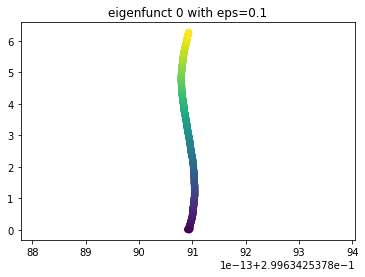

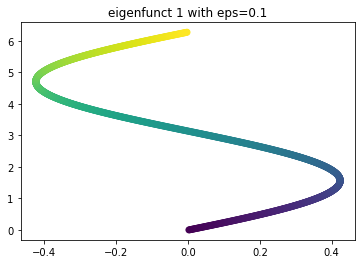

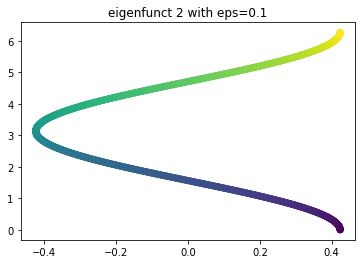

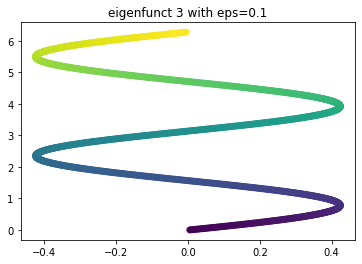

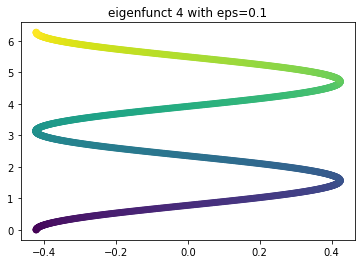

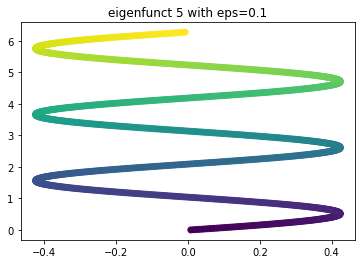

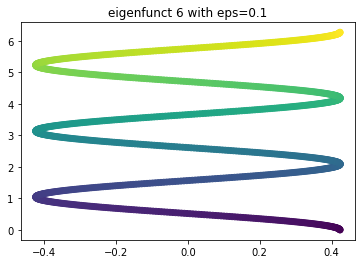

In [2]:
# task2.1
print("doing task2.1")
x, t = get_part_one_dataset()
visualize = True
if visualize:
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(x[:, 0], x[:, 1], t, c=t)
    plt.show()
dm = DiffusionMap()
phi_l, eps = dm.execute_algorithm(x)
if visualize:
    for i in range(phi_l.shape[1]):
        dm.plot_2D_diffusion_maps_task_one(phi_l[:, i], i, t, eps)

    

#### Task2.2: Use the algorithm to obtain the first ten eigenfunctions of the Laplace Beltrami operator on the $\textit{swiss roll}$ manifold,

doing task2.2


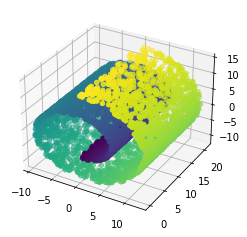

(5000, 5000)
algorithm executed


D:\UniPi\erasmus\courses\MLCS\MLCMS-exercises\EX4\task2\diffusion_maps.py:81: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


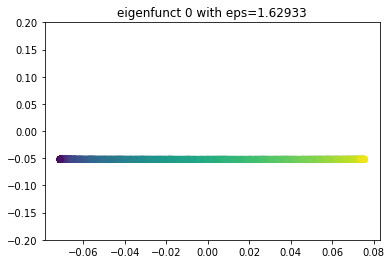

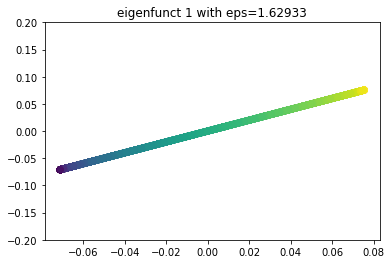

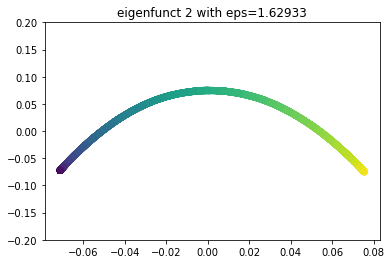

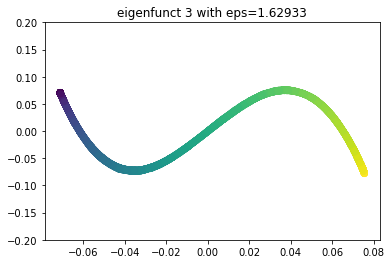

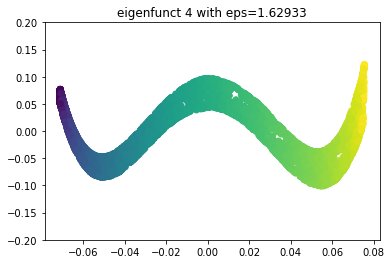

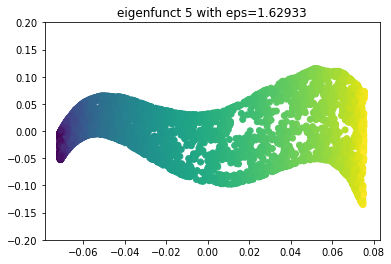

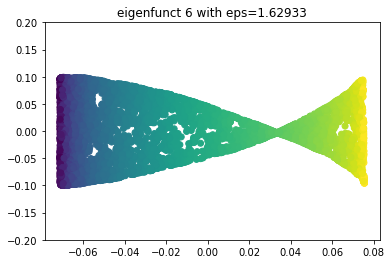

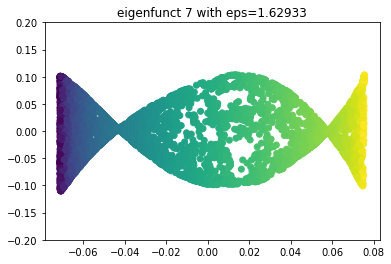

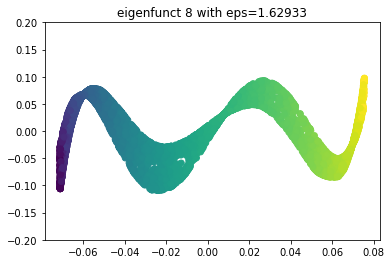

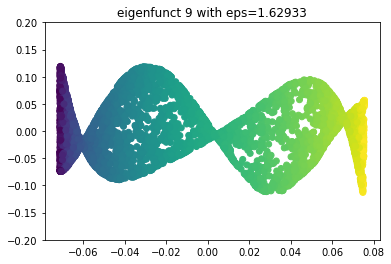

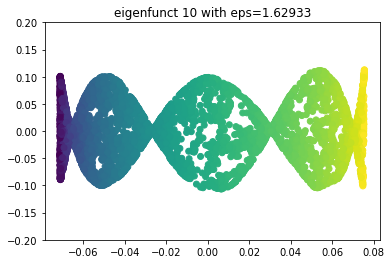

In [3]:
# task2.2
print("doing task2.2")
num_samples = 5000
x, t = make_swiss_roll(num_samples)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=t)
plt.show()

dm = DiffusionMap()
phi_l, eps = dm.execute_algorithm(x, L=10)
print("algorithm executed")
for i in range(phi_l.shape[1]):
    dm.plot_2D_diffusion_maps_task_two(phi_l[:, 1], phi_l[:, i], i, t, eps, lim=0.2)

Compute the three principal
components of the swiss-roll dataset

In [4]:
U, S, V = svd(x, center=True)
Vt = V.T

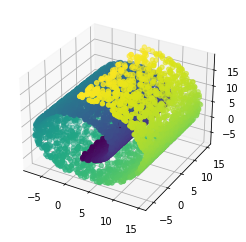

In [5]:
fig = plt.figure()
reconstruction = U@S@Vt + np.mean(x)
ax = fig.add_subplot(projection='3d')
ax.scatter(reconstruction[:, 0], reconstruction[:, 1], reconstruction[:, 2], c=t)
plt.show()

In [6]:
singular_values = np.diagonal(S)
energy_3 = np.sum(np.square(singular_values[:3])) / np.sum(np.square(singular_values))
energy_2 = np.sum(np.square(singular_values[:2])) / np.sum(np.square(singular_values))
energy_1 = np.sum(np.square(singular_values[:1])) / np.sum(np.square(singular_values))
energy_3, energy_2, energy_1

(1.0, 0.7118621059340747, 0.39049856766834673)

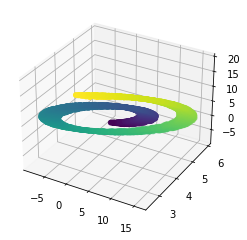

In [7]:
fig = plt.figure()
new_S = S.copy()
new_S[2,2] = 0
reconstruction = U@new_S@Vt + np.mean(x)
ax = fig.add_subplot(projection='3d')
ax.scatter(reconstruction[:, 0], reconstruction[:, 1], reconstruction[:, 2], c=t)
plt.show()

What happens if only 1000 data points are used?

doing task2.2


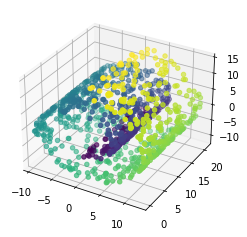

(1000, 1000)
algorithm executed


D:\UniPi\erasmus\courses\MLCS\MLCMS-exercises\EX4\task2\diffusion_maps.py:81: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


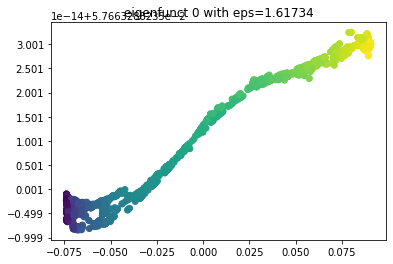

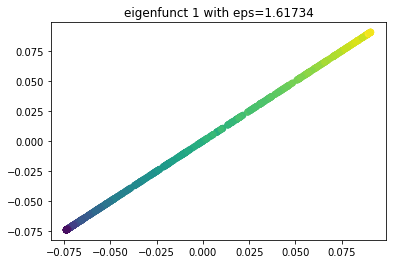

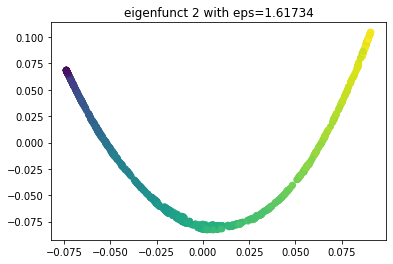

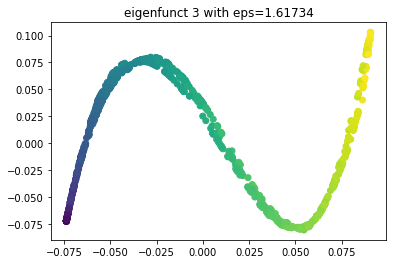

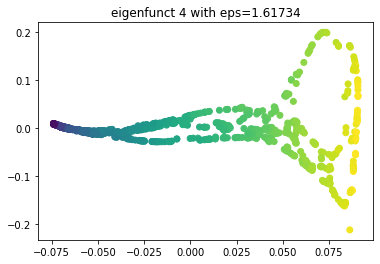

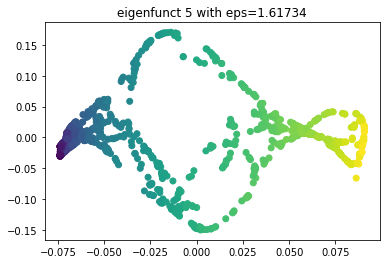

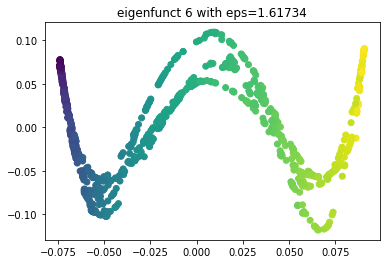

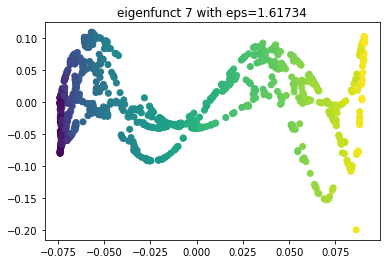

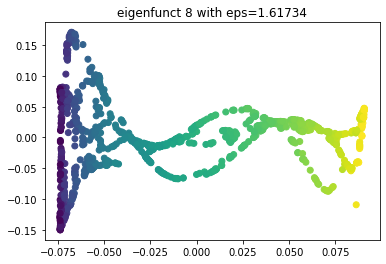

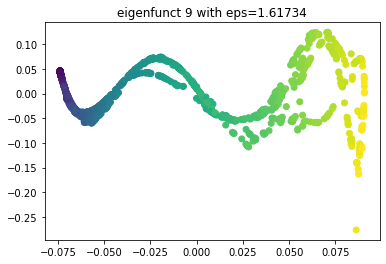

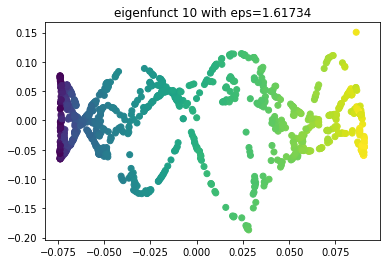

In [8]:
# task2.2
print("doing task2.2")
num_samples = 1000
x, t = make_swiss_roll(num_samples)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=t)
plt.show()

dm = DiffusionMap()
phi_l, eps = dm.execute_algorithm(x, L=10)
print("algorithm executed")
for i in range(phi_l.shape[1]):
    dm.plot_2D_diffusion_maps_task_two(phi_l[:, 1], phi_l[:, i], i, t, eps)

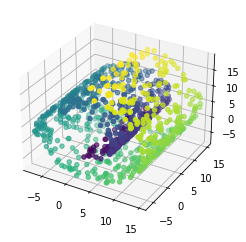

(1.0, 0.7222686651091698, 0.3948503289739242)

In [9]:
U, S, V = svd(x, center=True)
Vt = V.T
fig = plt.figure()
reconstruction = U@S@Vt + np.mean(x)
ax = fig.add_subplot(projection='3d')
ax.scatter(reconstruction[:, 0], reconstruction[:, 1], reconstruction[:, 2], c=t)
plt.show()
singular_values = np.diagonal(S)
energy_3 = np.sum(np.square(singular_values[:3])) / np.sum(np.square(singular_values))
energy_2 = np.sum(np.square(singular_values[:2])) / np.sum(np.square(singular_values))
energy_1 = np.sum(np.square(singular_values[:1])) / np.sum(np.square(singular_values))
energy_3, energy_2, energy_1

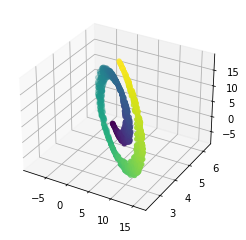

In [10]:
fig = plt.figure()
new_S = S.copy()
new_S[2,2] = 0
reconstruction = U@new_S@Vt + np.mean(x)
ax = fig.add_subplot(projection='3d')
ax.scatter(reconstruction[:, 0], reconstruction[:, 1], reconstruction[:, 2], c=t)
plt.show()

Analyze the data set by projecting the 30-dimensional data points (one in each row of the file) to the first
two principal components.

In [11]:
# read the trajectories data
trajs = pd.read_csv("data/data_DMAP_PCA_vadere.txt", header=None, sep=" ")
trajs.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,7.682746,16.590135,13.483825,16.516303,4.094633,12.947896,6.185209,14.051827,2.384750,11.906402,...,7.618038,14.830008,5.793517,7.085613,13.165387,18.276296,10.980464,17.096179,5.906016,15.322550
1,8.145535,16.648409,13.277208,16.328543,4.044564,12.747607,6.039434,14.420585,2.158819,11.833650,...,7.307820,14.957749,5.541795,7.212933,13.209182,18.195222,11.202859,17.305462,5.822190,15.679348
2,7.887370,16.508989,13.481755,16.028657,3.819413,13.021751,5.865487,14.156773,1.987087,11.675436,...,7.386211,14.685901,5.426626,7.085823,13.417320,18.207198,11.005363,17.370636,5.552942,15.409457
3,7.946284,16.306714,13.712739,16.406934,4.325781,12.930226,5.501616,14.330293,1.944104,11.744856,...,7.323483,14.580033,5.046127,7.388251,13.822416,18.175465,11.041945,16.840682,5.196317,15.293325
4,7.890591,16.154034,13.680053,16.130988,4.193020,13.185905,6.015438,14.806179,1.696377,11.606308,...,6.681000,14.940958,5.360103,7.249443,13.255405,17.885457,11.012918,17.334755,5.829825,15.386860


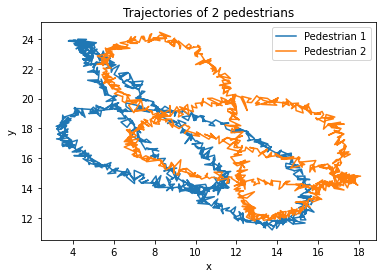

In [12]:
# save the trajectories of the first 2 pedestrians in 2 apposite dataframes
ped1 = trajs.loc[:, 0:1].to_numpy()
ped2 = trajs.loc[:, 2:3].to_numpy()

# plot the trajectories
plot_2_trajectories(ped1, ped2)

(1000, 1000)
algorithm executed


D:\UniPi\erasmus\courses\MLCS\MLCMS-exercises\EX4\task2\diffusion_maps.py:97: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


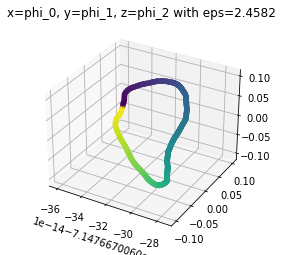

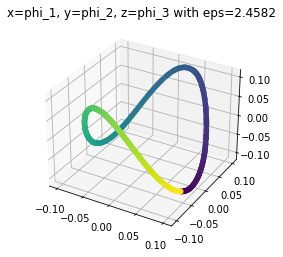

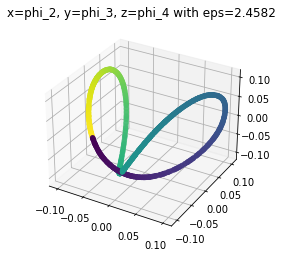

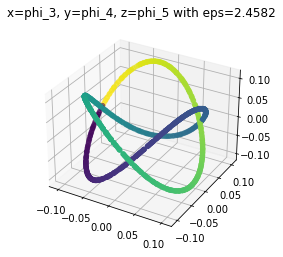

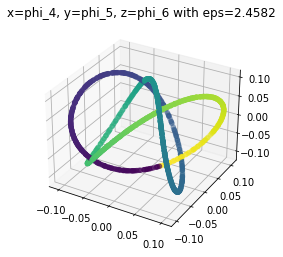

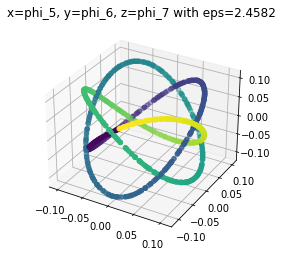

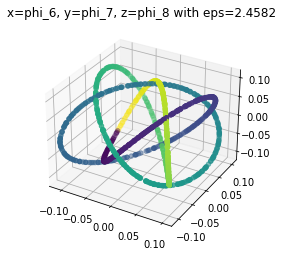

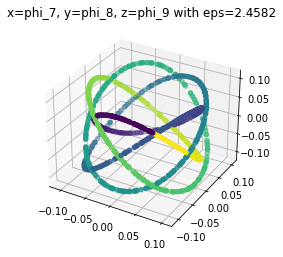

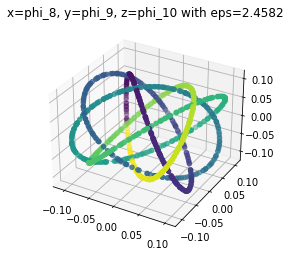

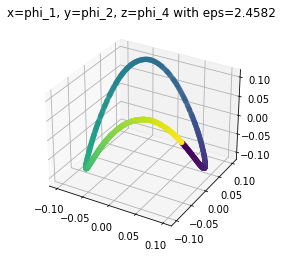

In [13]:
dm = DiffusionMap()
phi_l, eps = dm.execute_algorithm(trajs, L=10)
print("algorithm executed")
for i in range(1, phi_l.shape[1] - 1):
    dm.plot_3D_diffusion_maps_task_three(phi_l[:, i-1], phi_l[:, i], phi_l[:, i+1], i-1, i, i+1, range(phi_l.shape[0]), eps)
dm.plot_3D_diffusion_maps_task_three(phi_l[:, 1], phi_l[:, 2], phi_l[:, 4], 1, 2, 4, range(phi_l.shape[0]), eps)

### BONUS! USING DATAFOLD FOR CALCULATING DIFFUSION MAPS IN SWISS ROLL DATASET

In [14]:
import datafold.dynfold as dfold
import datafold.pcfold as pfold
from datafold.dynfold import LocalRegressionSelection
from datafold.utils.plot import plot_pairwise_eigenvector

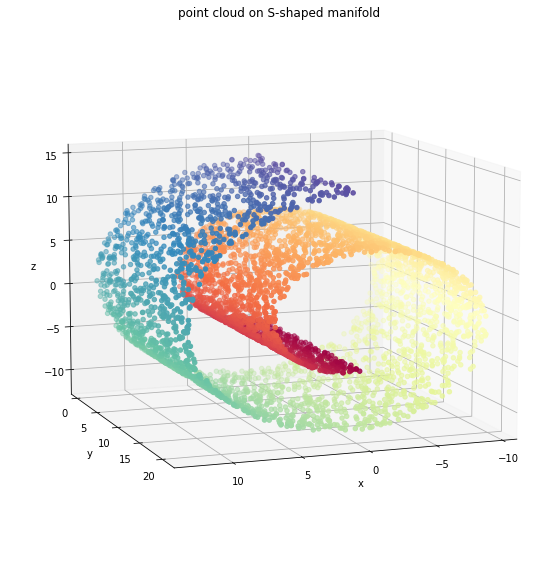

In [15]:
nr_samples = 15000

# reduce number of points for plotting
nr_samples_plot = 5000
idx_plot = np.random.permutation(nr_samples)[0:nr_samples_plot]

# generate point cloud
X, X_color = make_swiss_roll(nr_samples, random_state=0, noise=0)

# plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    X[idx_plot, 0],
    X[idx_plot, 1],
    X[idx_plot, 2],
    c=X_color[idx_plot],
    cmap=plt.cm.Spectral,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("point cloud on S-shaped manifold")
ax.view_init(10, 70)

In [16]:
X_pcm = pfold.PCManifold(X)
X_pcm.optimize_parameters()

print(f"epsilon={X_pcm.kernel.epsilon}, cut-off={X_pcm.cut_off}")

epsilon=0.19757200726197038, cut-off=1.9077240024999935


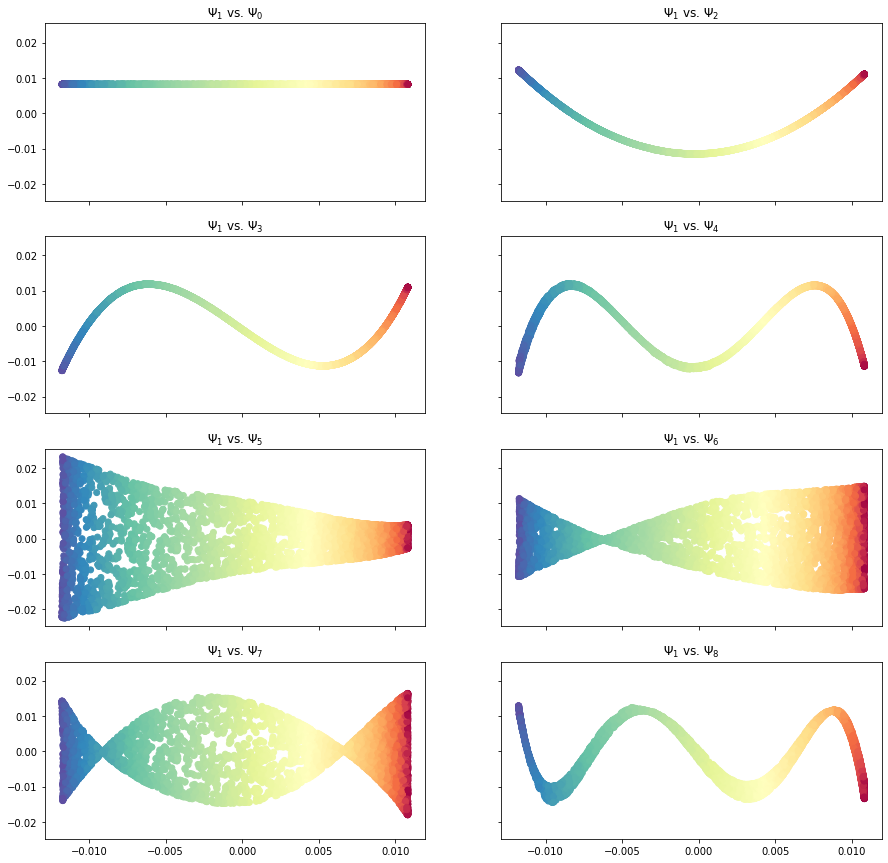

In [17]:
dmap = dfold.DiffusionMaps(
    kernel=pfold.GaussianKernel(epsilon=X_pcm.kernel.epsilon),
    n_eigenpairs=9,
    dist_kwargs=dict(cut_off=X_pcm.cut_off),
)
dmap = dmap.fit(X_pcm)
evecs, evals = dmap.eigenvectors_, dmap.eigenvalues_

plot_pairwise_eigenvector(
    eigenvectors=dmap.eigenvectors_[idx_plot, :],
    n=1,
    fig_params=dict(figsize=[15, 15]),
    scatter_params=dict(cmap=plt.cm.Spectral, c=X_color[idx_plot]),
)

In [18]:
selection = LocalRegressionSelection(
    intrinsic_dim=2, n_subsample=500, strategy="dim"
).fit(dmap.eigenvectors_)
print(f"Found parsimonious eigenvectors (indices): {selection.evec_indices_}")

Found parsimonious eigenvectors (indices): [1 5]


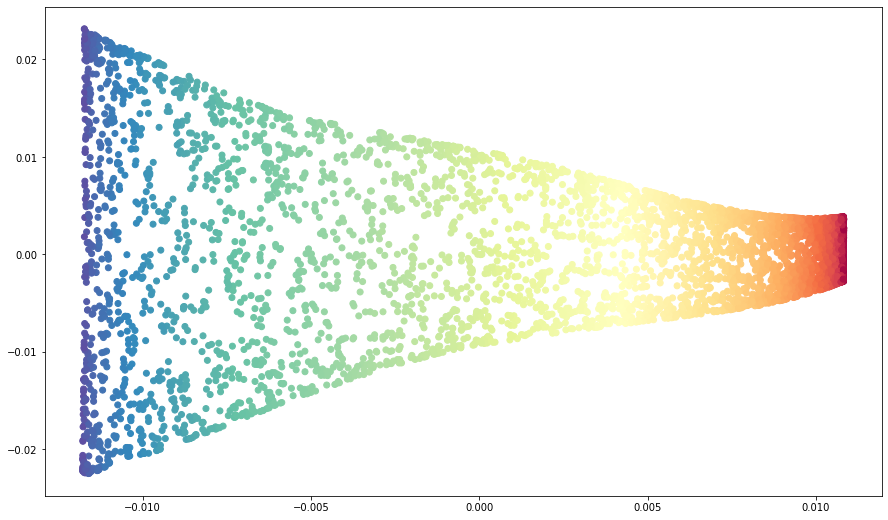

In [19]:
target_mapping = selection.transform(dmap.eigenvectors_)

f, ax = plt.subplots(figsize=(15, 9))
ax.scatter(
    target_mapping[idx_plot, 0],
    target_mapping[idx_plot, 1],
    c=X_color[idx_plot],
    cmap=plt.cm.Spectral,
);

In [20]:
t_pcm = pfold.PCManifold(trajs)
t_pcm.optimize_parameters()

print(f"epsilon={t_pcm.kernel.epsilon}, cut-off={t_pcm.cut_off}")

epsilon=1.1889188145295266, cut-off=4.679817722190334


(1000, 9)


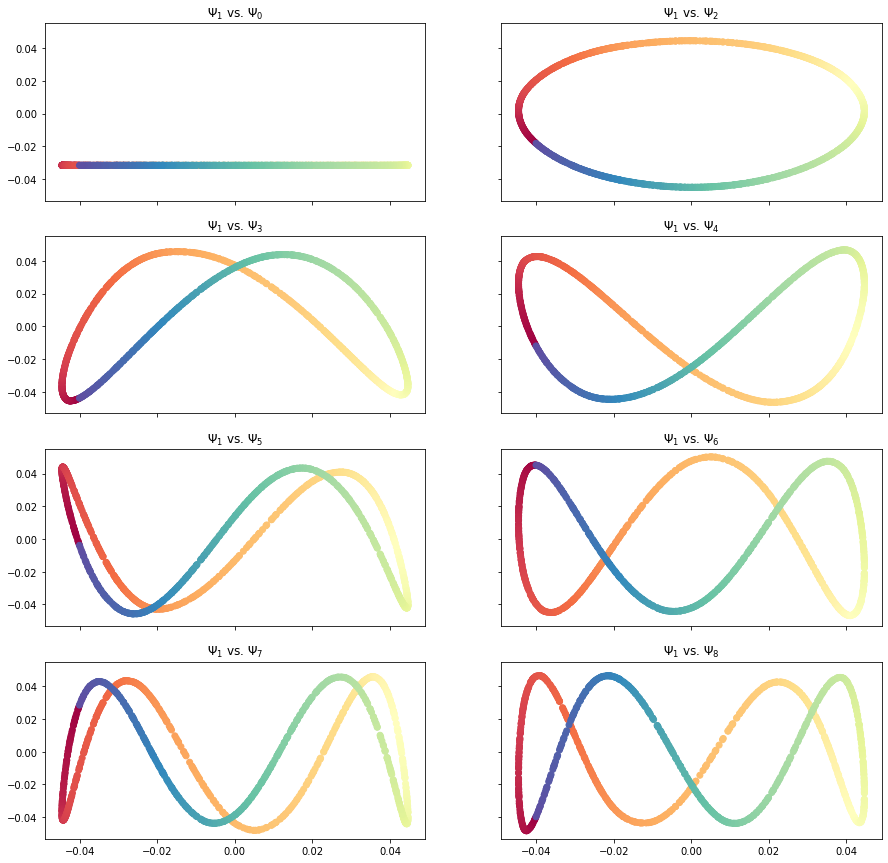

In [21]:
idx_plot_2 = 999
dmap_2 = dfold.DiffusionMaps(
    kernel=pfold.GaussianKernel(epsilon=t_pcm.kernel.epsilon),
    n_eigenpairs=9,
    dist_kwargs=dict(cut_off=t_pcm.cut_off),
)
dmap_2 = dmap_2.fit(t_pcm)
evecs_2, evals_2 = dmap_2.eigenvectors_, dmap_2.eigenvalues_
print(dmap_2.eigenvectors_.shape)
plot_pairwise_eigenvector(
    eigenvectors=dmap_2.eigenvectors_[:, :],
    n=1,
    fig_params=dict(figsize=[15, 15]),
    scatter_params=dict(cmap=plt.cm.Spectral, c=range(len(trajs))),
)

In [68]:
selection = LocalRegressionSelection(
    intrinsic_dim=2, n_subsample=500, strategy="dim"
).fit(dmap_2.eigenvectors_)
print(f"Found parsimonious eigenvectors (indices): {selection.evec_indices_}")
selection.residuals_

Found parsimonious eigenvectors (indices): [1 2]


array([       nan, 1.        , 0.99055197, 0.19978987, 0.3290761 ,
       0.23041067, 0.31775504, 0.24173208, 0.28266362])